# AIS Summer Comp (Advay Vyas)

### Imports and data

In [57]:
# imports
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from string import digits
import pandas as pd
import numpy as np
import seaborn as sns
import pprint
import matplotlib.pyplot as plt
from math import sqrt

In [58]:
# load data
all_data = pd.read_csv('C:\\Users\\advay\\OneDrive\\Desktop\\Coding\\VSCode\\Python\\AIS Summer Comp 2022\\train.csv')
all_data.head()

,ID,Population,Median Age,Unemployment Rate,Median Income,Poverty Rate,Median House Price
0,CA42,840562,35.6,5.1,7.8,26.5,455800
1,TX3,913161,37.5,4.0,6.2,54.5,365700
2,CA22,768917,33.0,6.6,15.2,24.5,298300
3,IL6,710626,42.1,3.1,4.6,53.2,334200
4,IN5,791257,38.3,3.5,8.1,47.9,219100


#### Preprocess data

In [59]:
# modifying ID column
for j in range(all_data.shape[0]):
    all_data.iloc[j, 0] = ''.join([i for i in all_data.iloc[j, 0] if not i.isdigit()])

all_data['ID'].head()

0    CA
1    TX
2    CA
3    IL
4    IN
Name: ID, dtype: object

In [60]:
# creating dummies
dummied_data = pd.get_dummies(all_data, columns=['ID'], prefix="state")

In [61]:
# get target
y = dummied_data['Median House Price']
y.head()

0    455800
1    365700
2    298300
3    334200
4    219100
Name: Median House Price, dtype: int64

In [62]:
# reading competition data
test_data = pd.read_csv('C:\\Users\\advay\\OneDrive\\Desktop\\Coding\VSCode\\Python\\AIS Summer Comp 2022\\evaluation_input.csv')
test_data.head()

,ID,Population,Median Age,Unemployment Rate,Median Income,Poverty Rate
0,TX35,857654,33.0,4.1,18.4,25.2
1,PR16,678333,43.0,4.6,13.5,28.3
2,NY4,730314,40.4,3.6,5.7,43.6
3,OR1,858875,38.0,3.8,8.9,40.7
4,GA8,706237,37.6,5.3,17.3,22.7


In [63]:
# modifying test ID column
for j in range((test_data).shape[0]):
    test_data.iloc[j, 0] = ''.join([i for i in test_data.iloc[j, 0] if not i.isdigit()])

test_data['ID'].head()

0    TX
1    PR
2    NY
3    OR
4    GA
Name: ID, dtype: object

In [64]:
# creating test dummies
dummied_test_data = pd.get_dummies(test_data, columns=['ID'], prefix="state")
dummied_test_data.describe()

,Population,Median Age,Unemployment Rate,Median Income,Poverty Rate,state_AK,state_AL,state_AR,state_AZ,state_CA,...,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,750993.207547,38.718396,4.526415,12.453774,32.354717,0.004717,0.014151,0.018868,0.014151,0.094340,...,0.047170,0.004717,0.028302,0.028302,0.066038,0.009434,0.033019,0.033019,0.028302,0.004717
std,52634.173803,3.665348,1.285449,4.340292,10.614375,0.068680,0.118393,0.136381,0.118393,0.292992,...,0.212504,0.068680,0.166226,0.166226,0.248936,0.096898,0.179109,0.179109,0.166226,0.068680
min,530066.000000,28.700000,2.200000,3.500000,10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,719479.500000,36.500000,3.600000,9.475000,24.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,746262.000000,38.750000,4.300000,11.700000,30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,779470.500000,40.425000,5.200000,14.800000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,960957.000000,56.000000,9.600000,26.100000,72.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# making data sets equivalent
dummied_data, dummied_test_data = dummied_data.align(dummied_test_data, join = 'right', axis = None)

In [66]:
# dummied test data
dummied_test_data.dropna(axis = 1)
dummied_test_data.describe()

,Population,Median Age,Unemployment Rate,Median Income,Poverty Rate,state_AK,state_AL,state_AR,state_AZ,state_CA,...,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,750993.207547,38.718396,4.526415,12.453774,32.354717,0.004717,0.014151,0.018868,0.014151,0.094340,...,0.047170,0.004717,0.028302,0.028302,0.066038,0.009434,0.033019,0.033019,0.028302,0.004717
std,52634.173803,3.665348,1.285449,4.340292,10.614375,0.068680,0.118393,0.136381,0.118393,0.292992,...,0.212504,0.068680,0.166226,0.166226,0.248936,0.096898,0.179109,0.179109,0.166226,0.068680
min,530066.000000,28.700000,2.200000,3.500000,10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,719479.500000,36.500000,3.600000,9.475000,24.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,746262.000000,38.750000,4.300000,11.700000,30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,779470.500000,40.425000,5.200000,14.800000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,960957.000000,56.000000,9.600000,26.100000,72.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# adding back the house prices
dummied_data['Median House Price'] = y
dummied_data.drop(dummied_data.tail(12).index, inplace = True)
dummied_data.fillna(0, inplace = True)
print(dummied_data.isnull())

     Population  Median Age  Unemployment Rate  Median Income  Poverty Rate  \
0         False       False              False          False         False   
1         False       False              False          False         False   
2         False       False              False          False         False   
3         False       False              False          False         False   
4         False       False              False          False         False   
..          ...         ...                ...            ...           ...   
195       False       False              False          False         False   
196       False       False              False          False         False   
197       False       False              False          False         False   
198       False       False              False          False         False   
199       False       False              False          False         False   

     state_AK  state_AL  state_AR  state_AZ  state_

In [68]:
# customizing features
features = dummied_data.columns.values.tolist()
features.remove('Median House Price')

In [69]:
# customizing key features
key_features = ['Population', 'Median Age', 'Unemployment Rate', 'Median Income', 'Poverty Rate']

In [70]:
# customizing states
states = features.copy()
states.remove('Population')
states.remove('Median Age')
states.remove('Unemployment Rate')
states.remove('Median Income')
states.remove('Poverty Rate')

In [71]:
# creating X
X = dummied_data[features]
X.head()
X.describe()

,Population,Median Age,Unemployment Rate,Median Income,Poverty Rate,state_AK,state_AL,state_AR,state_AZ,state_CA,...,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV
count,2.000000e+02,200.000000,200.000000,200.000000,200.00000,200.0,200.000000,200.0,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,7.519596e+05,38.859500,4.648500,12.195000,33.35100,0.0,0.020000,0.0,0.030000,0.165000,...,0.035000,0.005000,0.005000,0.015000,0.095000,0.010000,0.020000,0.015000,0.010000,0.010000
std,6.370597e+04,3.683893,1.441732,4.658809,11.40368,0.0,0.140351,0.0,0.171015,0.372112,...,0.184241,0.070711,0.070711,0.121857,0.293951,0.099748,0.140351,0.121857,0.099748,0.099748
min,5.292950e+05,30.300000,2.500000,3.800000,10.10000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.130718e+05,36.675000,3.675000,8.900000,24.57500,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.411770e+05,38.900000,4.300000,11.700000,31.90000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.867138e+05,41.100000,5.300000,14.525000,40.60000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.068778e+06,52.000000,10.600000,34.400000,65.80000,0.0,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection

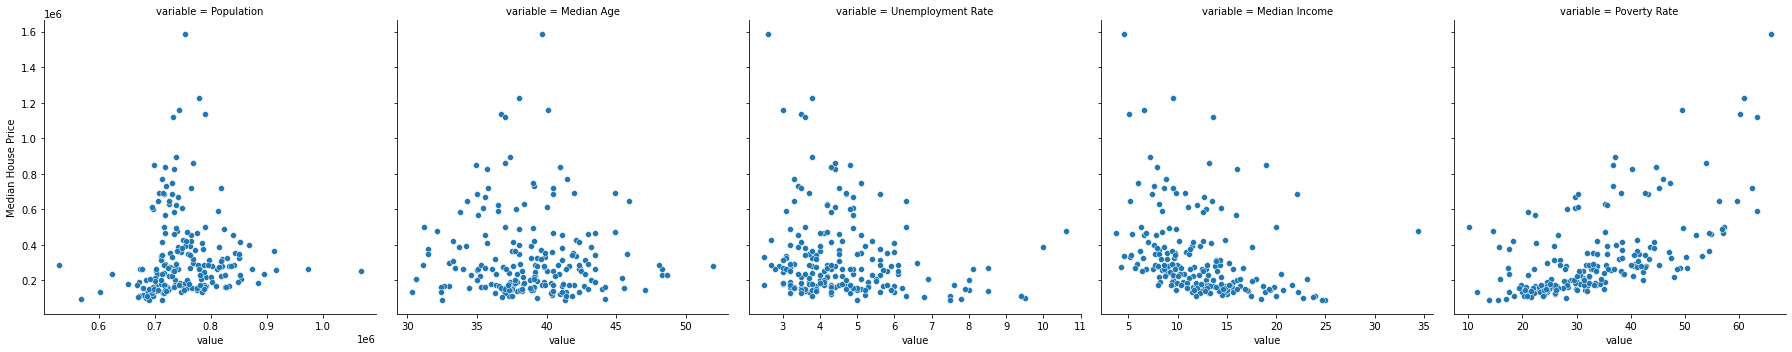

In [72]:
# seaborn plotting key features
discrete_features = X.dtypes == int

sns.relplot(
    x="value", y="Median House Price", col="variable", data=dummied_data.melt(id_vars="Median House Price", 
        value_vars=key_features), facet_kws=dict(sharex=False));

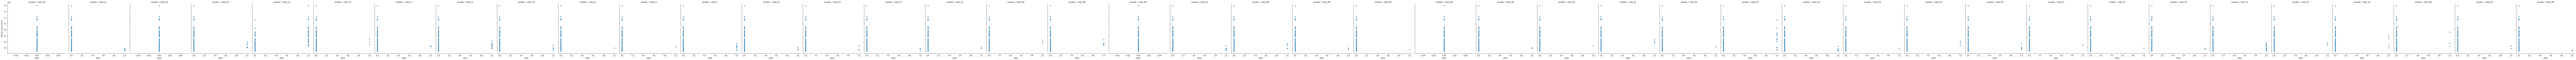

In [73]:
# seaborn plotting states
sns.relplot(
    x="value", y="Median House Price", col="variable", data=dummied_data.melt(id_vars="Median House Price", 
        value_vars=states), facet_kws=dict(sharex=False));

In [74]:
# features editing
features.remove('Median Age')
features.remove('Unemployment Rate')

In [75]:
# redeclaring X
X = dummied_data[features]
X.head()

,Population,Median Income,Poverty Rate,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,...,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV
0,840562.0,7.8,26.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,913161.0,6.2,54.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,768917.0,15.2,24.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,710626.0,4.6,53.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,791257.0,8.1,47.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Refined RandomForestRegressor with ID

#### Data distribution

In [76]:
# set up data distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)

#### Refining Model

##### Hyperparameter grid

In [77]:
# hyperparameter grid

from sklearn.model_selection import RandomizedSearchCV

# max features
max_features = ['sqrt', 'log2', None]

# bootstrap
bootstrap = ['True', 'False']

# tree depth
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
max_depth.append(None)

# max leaf nodes
max_leaf_nodes = [int(x) for x in np.linspace(start = 2, stop = 20, num = 8)]
max_leaf_nodes.append(None)

# min samples leaf
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
min_samples_leaf.append(1)

# min samples split
min_samples_split = [int(x) for x in np.linspace(start = 3, stop = 10, num = 5)]
min_samples_split.append(2)

# number of trees
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 450, num = 8)]
n_estimators.append(100)

##### Creating hyperparameter grid to use in tuning with k-fold cross validation

In [81]:
# create hyperparameter grid
hyperparameters = {
 'bootstrap': bootstrap,
 'max_depth': max_depth,
 'max_features': max_features,
 'max_leaf_nodes': max_leaf_nodes,
 'min_samples_leaf': min_samples_leaf,
 'min_samples_split': min_samples_split,
 'n_estimators': n_estimators}
               
pprint.pprint(hyperparameters)

{'bootstrap': ['True', 'False'],
 'max_depth': [1, 3, 5, 7, 10, None],
 'max_features': ['sqrt', 'log2', None],
 'max_leaf_nodes': [2, 4, 7, 9, 12, 14, 17, 20, None],
 'min_samples_leaf': [2, 4, 6, 8, 10, 1],
 'min_samples_split': [3, 4, 6, 8, 10, 2],
 'n_estimators': [50, 107, 164, 221, 278, 335, 392, 450, 100]}


#### K-fold CV with RandomizedSearchCV

In [82]:
# create base model
cv_model = RandomForestRegressor(random_state = 42, criterion = 'squared_error', max_features = None)

In [83]:
# fit and tune model
rf_clf = RandomizedSearchCV(cv_model, hyperparameters, n_iter = 150, cv = 5)
rf_clf.fit(X_train, y_train)      

print('Best Parameters')
print(rf_clf.best_params_)

Best Parameters
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 7, 'bootstrap': 'False'}


#### Evaluating the results

In [84]:
# evaluating function
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, predictions))
    print(error)

    return error

In [85]:
# evaluating model
model = RandomForestRegressor(random_state = 42, criterion = 'squared_error', max_features = None)
model.fit(X_train, y_train)
print('RMSE (lower is better)')
base_accuracy = evaluate(model, X_test, y_test)

RMSE (lower is better)
117062.00395850056


In [86]:
print('RMSE (lower is better)')
base_accuracy = evaluate(rf_clf, X_test, y_test)

RMSE (lower is better)
115857.3063571198


### Predicting competition data

In [87]:
# creating competition X
dummied_competition_X = dummied_test_data[features]
dummied_competition_X.head()

,Population,Median Income,Poverty Rate,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,...,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV
0,857654,18.4,25.2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,678333,13.5,28.3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,730314,5.7,43.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,858875,8.9,40.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,706237,17.3,22.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# fitting to test data
test_rf_clf = RandomizedSearchCV(cv_model, hyperparameters, n_iter = 150, cv = 5)
test_rf_clf.fit(X, y)      

print('Best Parameters')
print(test_rf_clf.best_params_)

Best Parameters
{'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_leaf_nodes': 9, 'max_features': None, 'max_depth': 3, 'bootstrap': 'True'}


In [95]:
# competition predictions
competition_preds = test_rf_clf.predict(dummied_competition_X)
print(competition_preds)

[ 178985.29038012  205935.98953901  407235.54812656  342708.92726545
  177283.09179856  203459.2444989   182556.20892771  342708.92726545
  331208.83236158  177283.09179856  389800.0809816   359416.45492129
  407530.43384085  342708.92726545  180599.58062955  177283.09179856
  362133.46646132  562751.26410883  207550.27978844  220937.92760907
  177283.09179856  177283.09179856  178897.38204799  370354.87868255
  351939.58305557  722596.22933153  382735.62945178  331208.83236158
  353359.82432541  244006.94982212  177283.09179856  353359.82432541
  431719.03308517  182556.20892771  178897.38204799  426725.67411081
  180599.58062955  353359.82432541  207638.18812057  226298.95307034
  211209.10666816  177283.09179856  220937.92760907  407530.43384085
  226707.91823229  412239.82457737  342708.92726545  212911.30524972
  177283.09179856  177283.09179856  219323.63735964 1138138.07425382
  177283.09179856  178897.38204799  224596.75448878  205935.98953901
  342708.92726545  177283.09179856

### Generating submission

In [96]:
# To hold ID values
placeholder = pd.read_csv('C:\\Users\\advay\\OneDrive\\Desktop\\Coding\VSCode\\Python\\AIS Summer Comp 2022\\evaluation_input.csv')

In [97]:
# Creating and outputting DataFrame
output = pd.DataFrame({'ID': placeholder.ID, 'Median House Price': competition_preds})
output.to_csv('Vyas_Advay_answer.csv', index=False)